# Fine Tune Models

### Unzip best 10 models

In [8]:
# extract best initial trained models

models_it_location = wd + 'content/best-it-models'
unzip_data(f'{models_it_location}.zip')

### Import I.T. Models

In [ ]:
model_loc = wd + "content/"

model_it_1_name = "b3_base_it_pooling_average_flip_horizontal_and_vertical_rotation_0.5_translation_0.4.h5"
model_it_2_name = "b3_base_it_pooling_None_flip_None_rotation_0.1_translation_0.4.h5"
model_it_3_name = "b3_base_it_pooling_None_flip_horizontal_and_vertical_rotation_None_translation_0.2.h5"
model_it_4_name = "b3_base_it_pooling_None_flip_horizontal_and_vertical_rotation_0.5_translation_0.2.h5"
model_it_5_name = "b3_base_it_pooling_max_flip_horizontal_and_vertical_rotation_0.1_translation_0.1.h5"
model_it_6_name = "b3_base_it_pooling_average_flip_None_rotation_None_translation_0.4.h5"
model_it_7_name = "b3_base_it_pooling_average_flip_horizontal_and_vertical_rotation_None_translation_0.4.h5"
model_it_8_name = "b3_base_it_pooling_average_flip_horizontal_and_vertical_rotation_0.1_translation_0.1.h5"
model_it_9_name = "b3_base_it_pooling_None_flip_None_rotation_0.1_translation_0.1.h5"
model_it_10_name = "b3_base_it_pooling_None_flip_horizontal_and_vertical_rotation_0.2_translation_0.4.h5"

it_model_list = [model_it_1_name, model_it_2_name, model_it_3_name, model_it_4_name, model_it_5_name, model_it_6_name, model_it_7_name, model_it_8_name, model_it_9_name, model_it_10_name]

# for testing
#it_model_list = [model_it_1_name, model_it_2_name, model_it_3_name]

### Fine Tuning Functions

In [ ]:
BATCH_SIZE = 12

In [ ]:
def train_and_fit_fine_tune(model, model_name):

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-7),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

  model_history = model.fit([sag_train, cor_train, ax_train, pretreatment_train], \
                        Ytrain, epochs = 25, verbose = 1, \
                        callbacks= [early_stop, create_model_checkpoint('/content/ft_models', model_name), lr_schedule], \
                        validation_data = ([sag_val, cor_val, ax_val, pretreatment_val], Yval), \
                        batch_size = BATCH_SIZE 
                        )
  return model_history

In [ ]:
def fine_tune_all_models(it_model_list):

  model_loc = "/content/"

  for it_model_name in it_model_list:
    model = tf.keras.models.load_model(model_loc + it_model_name)
    model.trainable = True
    print(it_model_name)
    print(model.summary())

    model_history = train_and_fit_fine_tune(model, it_model_name.replace("_it_", "_ft_"))

    plot_loss_curves(model_history)

### FIne Tune All 10 Models

b3_base_it_pooling_average_flip_horizontal_and_vertical_rotation_0.5_translation_0.4.h5
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_15 (InputLayer)          [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_16 (InputLayer)          [(None, 300, 300, 3  0           []                               
    

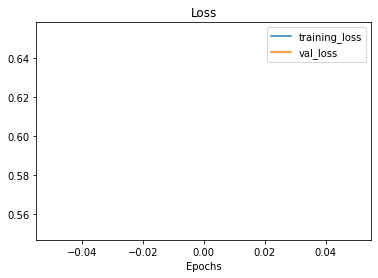

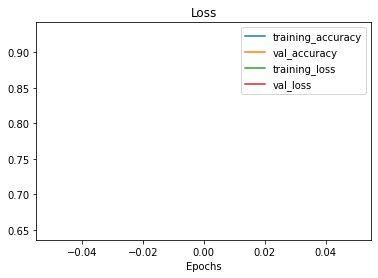

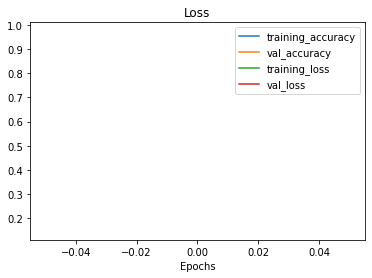

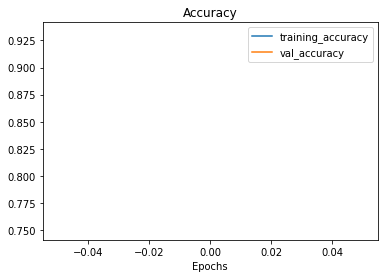

In [30]:
fine_tune_all_models(it_model_list)

# Test Fine Tuned Models

### Import top 3 fine tuned models

In [13]:
from sklearn.metrics import confusion_matrix

In [ ]:
# extract best fine tuned models

models_ft_location = wd + 'content/best-ft-models'
unzip_data(f'{models_ft_location}.zip')

In [14]:
model_it_1_name = "b3_base_it_pooling_None_flip_horizontal_and_vertical_rotation_0.5_translation_0.2"
model_ft_1_name = "b3_base_ft_pooling_None_flip_horizontal_and_vertical_rotation_0.5_translation_0.2"

model_it_2_name = "b3_base_it_pooling_average_flip_None_rotation_None_translation_0.4"
model_ft_2_name = "b3_base_ft_pooling_average_flip_None_rotation_None_translation_0.4"

model_it_3_name = "b3_base_it_pooling_average_flip_horizontal_and_vertical_rotation_0.5_translation_0.4"
model_ft_3_name = "b3_base_ft_pooling_average_flip_horizontal_and_vertical_rotation_0.5_translation_0.4"

### Testing Function

In [20]:
def test_models(model_it_name, model_ft_name):

  print(f'Testing Model: {model_ft_name}:\n')

  print('Before Fine Tuning:')
  model = tf.keras.models.load_model("/content/" + model_it_name + ".h5")
  model.evaluate([sag_test, cor_test, ax_test, pretreatment_test],Ytest)

  print('\nAfter Fine Tuning: ')
  model = tf.keras.models.load_model("/content/" + model_ft_name + ".h5")
  model.evaluate([sag_test, cor_test, ax_test, pretreatment_test],Ytest)

  Ypred = model.predict([sag_test, cor_test, ax_test, pretreatment_val]).argmax(axis = 1)
  print(f'Test Set Truth: \n{Ytest}\n')
  print(f'Test Set Prediction:\n{Ypred}\n')

  
  print('Confusion Matrix:')
  cm=confusion_matrix(Ytest, Ypred)
  print(cm)



### Test 3 Models

In [21]:
test_models(model_it_1_name, model_ft_1_name)

Testing Model: b3_base_ft_pooling_None_flip_horizontal_and_vertical_rotation_0.5_translation_0.2:

Before Fine Tuning:
4/4 [==============================] - 8s 436ms/step - loss: 2.3729 - accuracy: 0.4500

After Fine Tuning: 
4/4 [==============================] - 8s 433ms/step - loss: 1.9858 - accuracy: 0.3000
Test Set Truth: 
[1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0]

Test Set Prediction:
[0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0]

Confusion Matrix:
[[15 30]
 [35 20]]


In [22]:
test_models(model_it_2_name, model_ft_2_name)

Testing Model: b3_base_ft_pooling_average_flip_None_rotation_None_translation_0.4:

Before Fine Tuning:
4/4 [==============================] - 7s 433ms/step - loss: 2.4381 - accuracy: 0.4000

After Fine Tuning: 
4/4 [==============================] - 8s 436ms/step - loss: 2.4635 - accuracy: 0.4500
Test Set Truth: 
[1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0]

Test Set Prediction:
[0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0
 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1
 0 1 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 1 0]

Confusion Matrix:
[[20 25]
 [30 25]]


In [23]:
test_models(model_it_3_name, model_ft_3_name)

Testing Model: b3_base_ft_pooling_average_flip_horizontal_and_vertical_rotation_0.5_translation_0.4:

Before Fine Tuning:
4/4 [==============================] - 9s 433ms/step - loss: 2.0654 - accuracy: 0.2500

After Fine Tuning: 
4/4 [==============================] - 8s 436ms/step - loss: 2.2247 - accuracy: 0.3500
Test Set Truth: 
[1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1
 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0
 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 1 0]

Test Set Prediction:
[0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0
 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1]

Confusion Matrix:
[[20 25]
 [40 15]]


### Look into wrong predictions

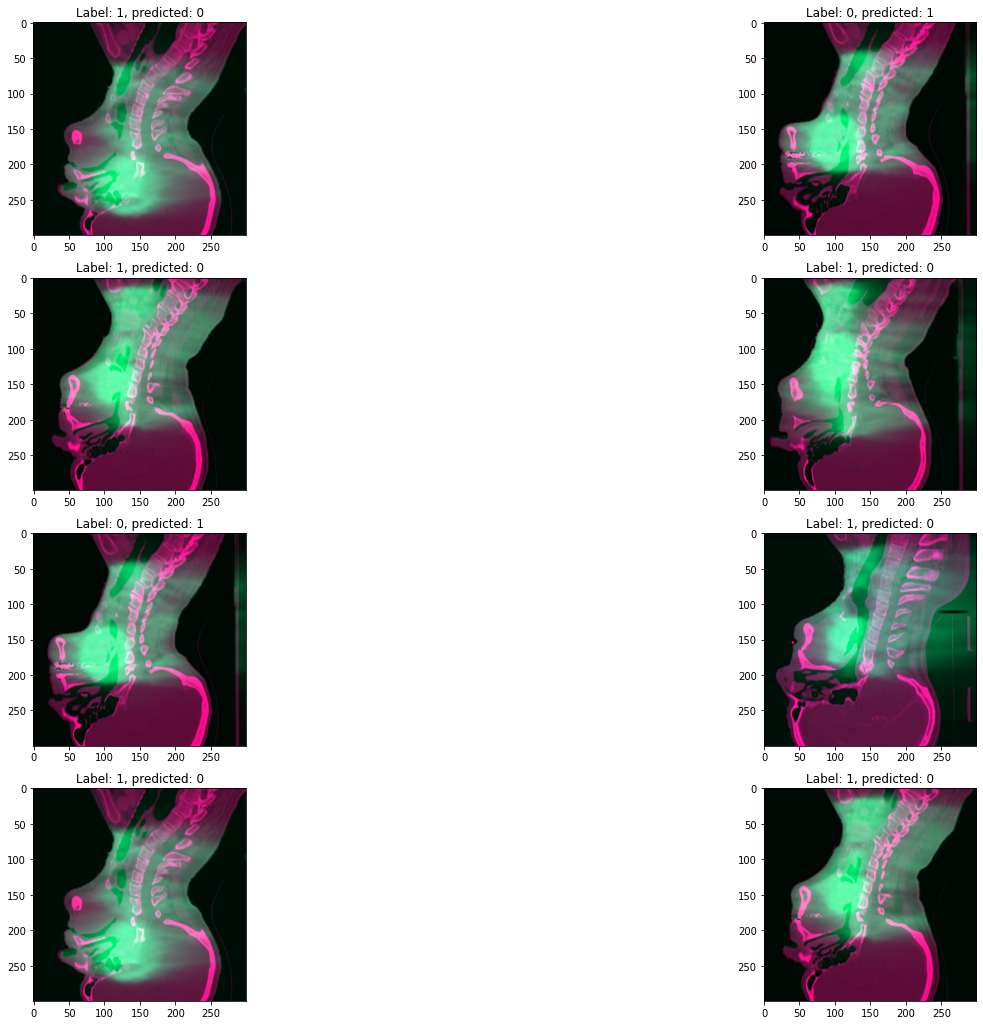

In [26]:
wrong_indexes = np.where(Ypred != Ytest)[0]

# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(wrong_indexes.shape[0], dtype = int),size = 8, replace = True)
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(4,2,ii+1)
    aux = sag_test[wrong_indexes[jj]]
    aux = (aux - aux.min())/(aux.max() - aux.min())
    plt.imshow(aux, cmap = "gray")
    plt.title("Label: %d, predicted: %d" %(Ytest[wrong_indexes[jj]],Ypred[wrong_indexes[jj]]))
plt.show()

### Look into right predictions

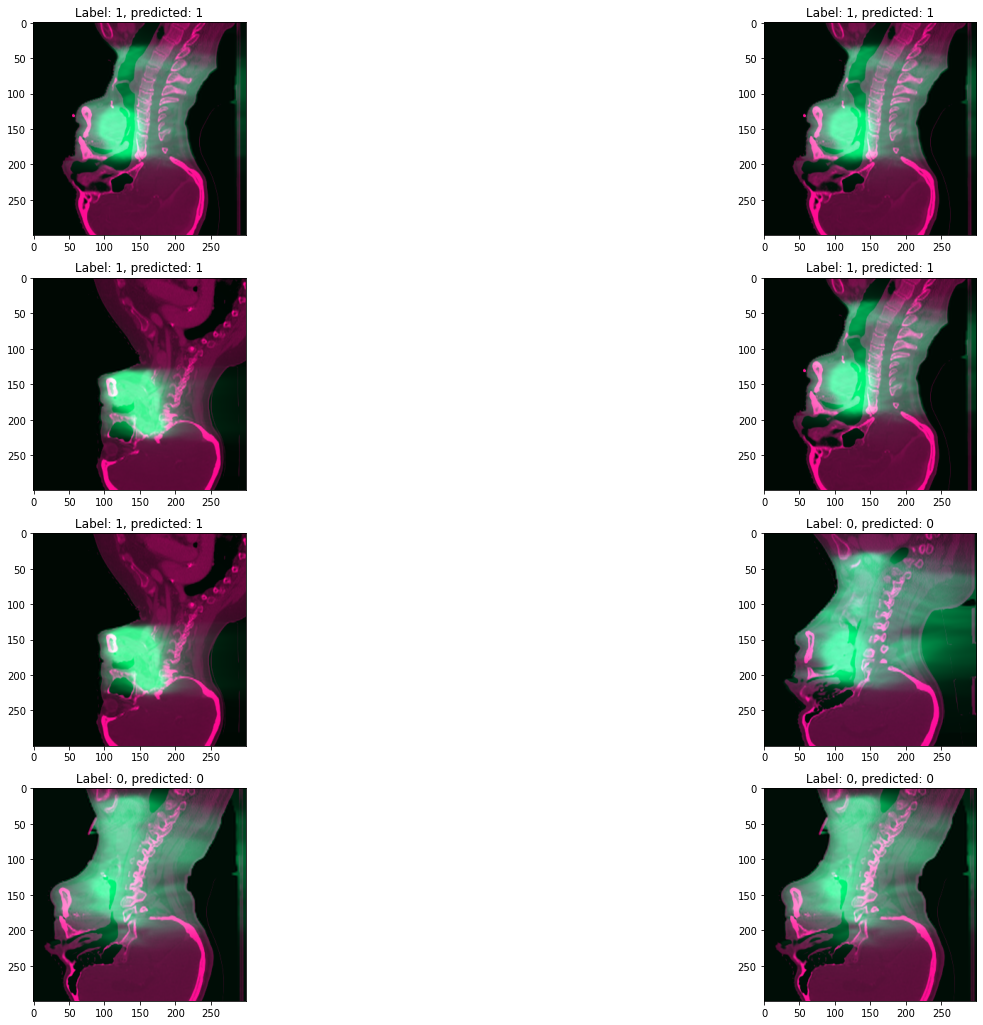

In [27]:
right_indexes = np.where(Ypred == Ytest)[0]

# Disaplying some samples from the development set
sample_indexes = np.random.choice(np.arange(right_indexes.shape[0], dtype = int),size = 8, replace = True)
plt.figure(figsize = (24,18))
for (ii,jj) in enumerate(sample_indexes):
    plt.subplot(4,2,ii+1)
    aux = sag_test[right_indexes[jj]]
    aux = (aux - aux.min())/(aux.max() - aux.min())
    plt.imshow(aux, cmap = "gray")
    plt.title("Label: %d, predicted: %d" %(Ytest[right_indexes[jj]],Ypred[right_indexes[jj]]))
plt.show()